In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [3]:
full_result_0 = pd.read_csv("./result_iot23/cm_0.csv")

In [4]:
full_result_0

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch
0,0.142068,0.969748,0.140252,0.968448,0,248,0,7612,1
1,0.131019,0.971498,0.139979,0.968448,0,248,0,7612,2
2,0.129941,0.971498,0.140769,0.968448,0,248,0,7612,3
3,0.130328,0.971498,0.143968,0.968448,0,248,0,7612,4
4,0.130325,0.971498,0.139733,0.968448,0,248,0,7612,5
5,0.130043,0.971498,0.141158,0.968448,0,248,0,7612,6
6,0.129976,0.971498,0.139584,0.968448,0,248,0,7612,7
7,0.129658,0.971498,0.139389,0.968448,0,248,0,7612,8
8,0.130030,0.971498,0.139158,0.968448,0,248,0,7612,9
9,0.129501,0.971498,0.139185,0.968448,0,248,0,7612,10


In [5]:
def draw_results(history_df):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.ylim(0.7,1.0)
    plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_df:
        plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.ylim(0.0,0.6)
    plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
    if 'val_loss' in history_df:
        plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
def cal_metric(df_cm):
    df_cm["tpr"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FN'])
    df_cm["far"] = df_cm['val_FP']/(df_cm['val_FP']+ df_cm['val_TN'])
    df_cm["precision"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FP'])
    df_cm["F1"] = 2*df_cm['tpr']*df_cm['precision']/(df_cm['tpr']+ df_cm['precision'])

In [13]:
def draw_metrics(history_df):
    plt.figure(figsize=(10, 6))
    plt.plot(history_df['epoch'], history_df['tpr'], label='True positive rate')
    plt.plot(history_df['epoch'], history_df['far'], label='False alarm rate')
    plt.plot(history_df['epoch'], history_df['precision'], label='Precision')
    plt.plot(history_df['epoch'], history_df['F1'], label='F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title('Matrics')
    plt.legend()
    
    plt.show()

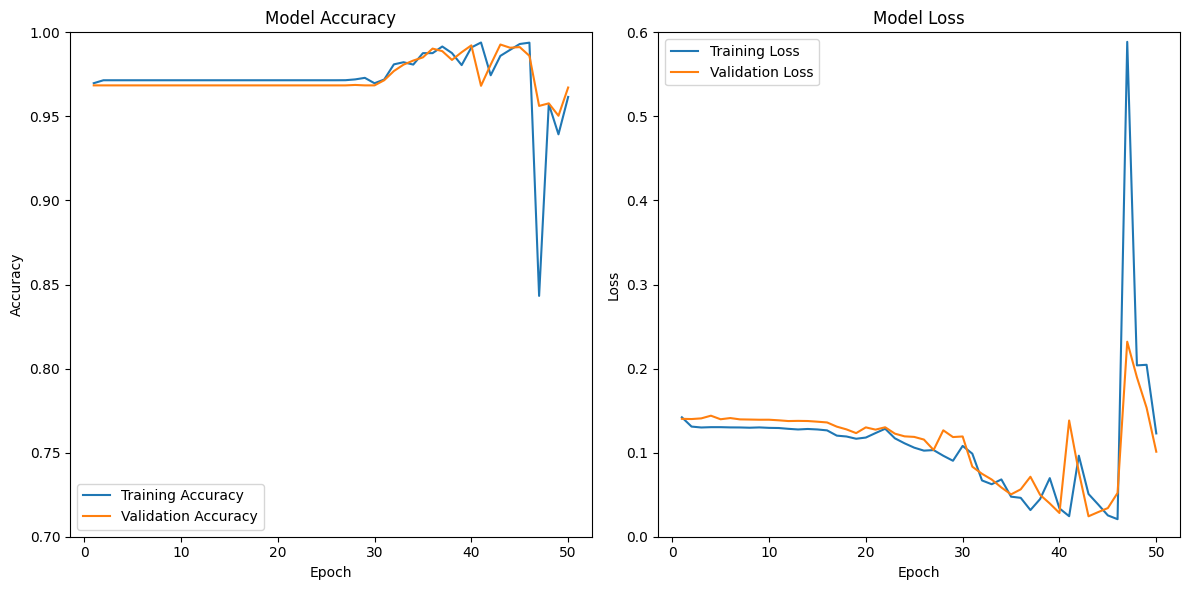

In [6]:
draw_results(full_result_0)

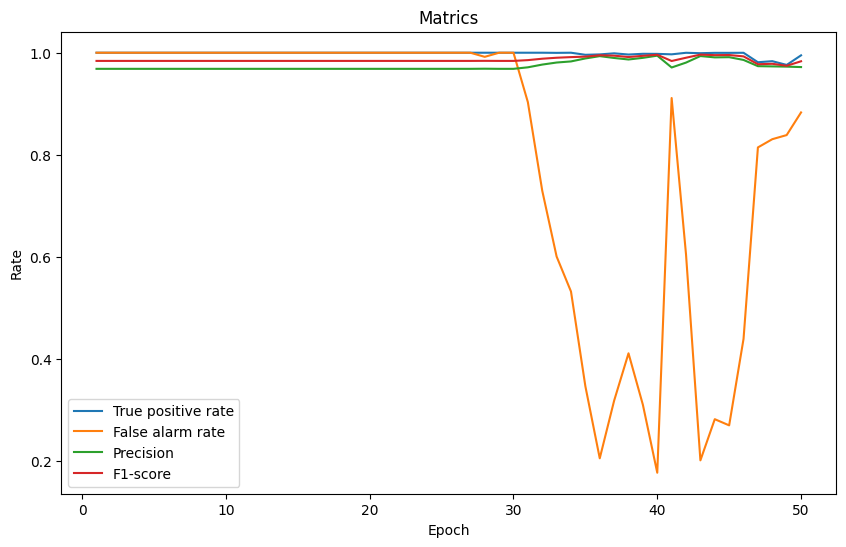

In [14]:
cal_metric(full_result_0)
draw_metrics(full_result_0)

In [17]:
full_result_1 = pd.read_csv("./result_iot23/cm_1.csv")
cal_metric(full_result_1)
full_result_1

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.140995,0.970480,0.140807,0.968448,0,248,0,7612,1,1.0,1.0,0.968448,0.983971
1,0.130769,0.971498,0.139998,0.968448,0,248,0,7612,2,1.0,1.0,0.968448,0.983971
2,0.130766,0.971498,0.140376,0.968448,0,248,0,7612,3,1.0,1.0,0.968448,0.983971
3,0.130304,0.971498,0.141167,0.968448,0,248,0,7612,4,1.0,1.0,0.968448,0.983971
4,0.130278,0.971498,0.139667,0.968448,0,248,0,7612,5,1.0,1.0,0.968448,0.983971
5,0.130122,0.971498,0.139554,0.968448,0,248,0,7612,6,1.0,1.0,0.968448,0.983971
6,0.129858,0.971498,0.139558,0.968448,0,248,0,7612,7,1.0,1.0,0.968448,0.983971
7,0.129753,0.971498,0.139283,0.968448,0,248,0,7612,8,1.0,1.0,0.968448,0.983971
8,0.129473,0.971498,0.139615,0.968448,0,248,0,7612,9,1.0,1.0,0.968448,0.983971
9,0.129561,0.971498,0.138612,0.968448,0,248,0,7612,10,1.0,1.0,0.968448,0.983971


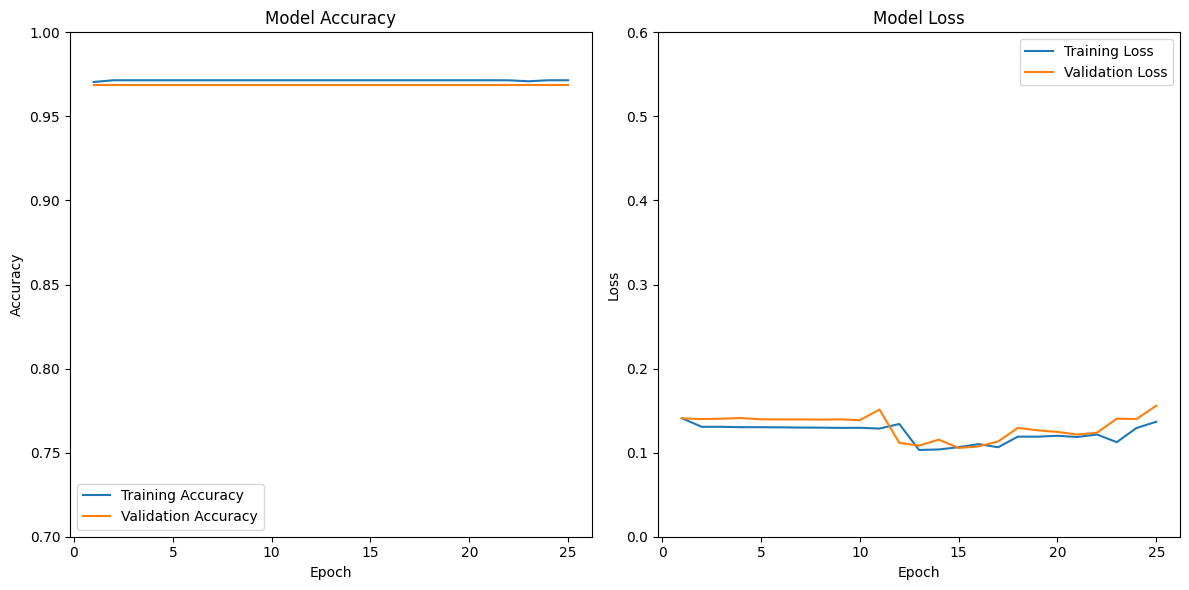

In [7]:

draw_results(full_result_1)

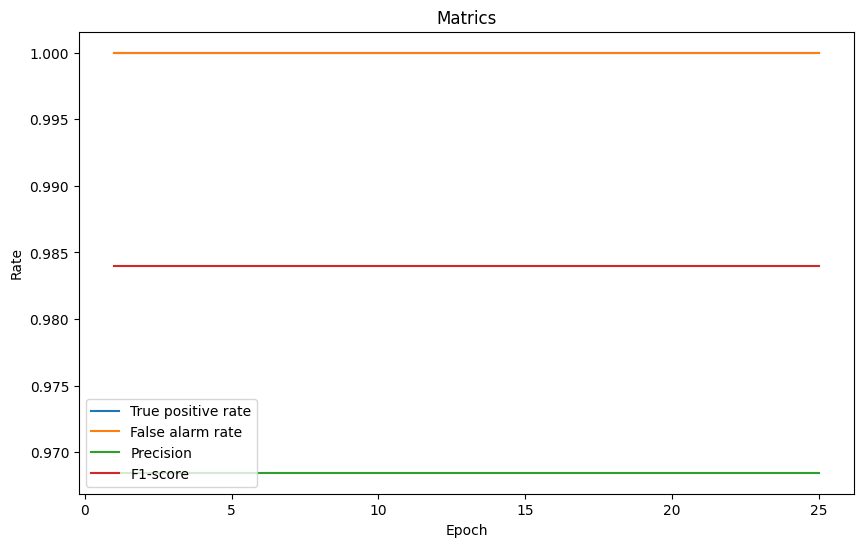

In [15]:

draw_metrics(full_result_1)

In [18]:
full_result_2 = pd.read_csv("./result_iot23/cm_2.csv")
cal_metric(full_result_2)
full_result_2


,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.143957,0.970193,0.141137,0.968448,0,248,0,7612,1,1.0,1.0,0.968448,0.983971
1,0.130551,0.971498,0.140501,0.968448,0,248,0,7612,2,1.0,1.0,0.968448,0.983971
2,0.130318,0.971498,0.140117,0.968448,0,248,0,7612,3,1.0,1.0,0.968448,0.983971
3,0.130575,0.971498,0.140104,0.968448,0,248,0,7612,4,1.0,1.0,0.968448,0.983971
4,0.130516,0.971498,0.140951,0.968448,0,248,0,7612,5,1.0,1.0,0.968448,0.983971
5,0.129889,0.971498,0.141688,0.968448,0,248,0,7612,6,1.0,1.0,0.968448,0.983971
6,0.130169,0.971498,0.139481,0.968448,0,248,0,7612,7,1.0,1.0,0.968448,0.983971
7,0.129446,0.971498,0.139617,0.968448,0,248,0,7612,8,1.0,1.0,0.968448,0.983971
8,0.129706,0.971498,0.138932,0.968448,0,248,0,7612,9,1.0,1.0,0.968448,0.983971
9,0.129291,0.971498,0.138501,0.968448,0,248,0,7612,10,1.0,1.0,0.968448,0.983971


In [ ]:
draw_results(full_result_2)

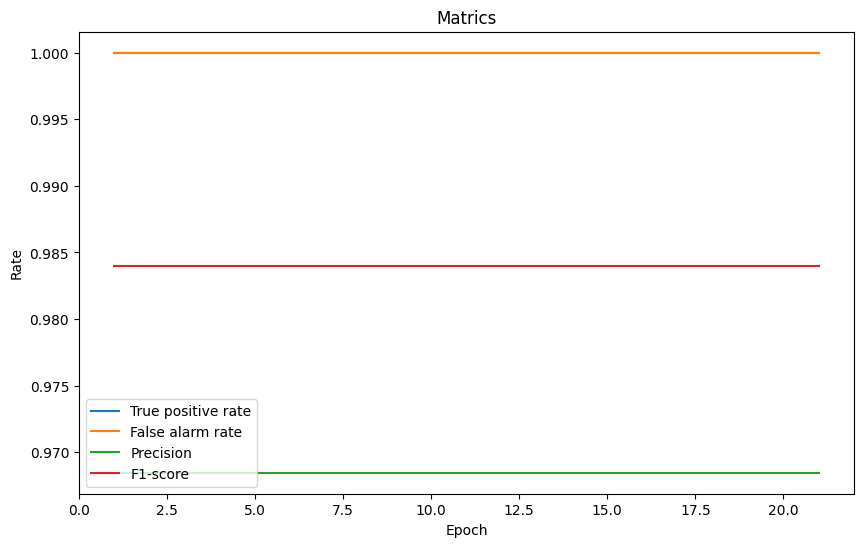

In [16]:
cal_metric(full_result_2)
draw_metrics(full_result_2)

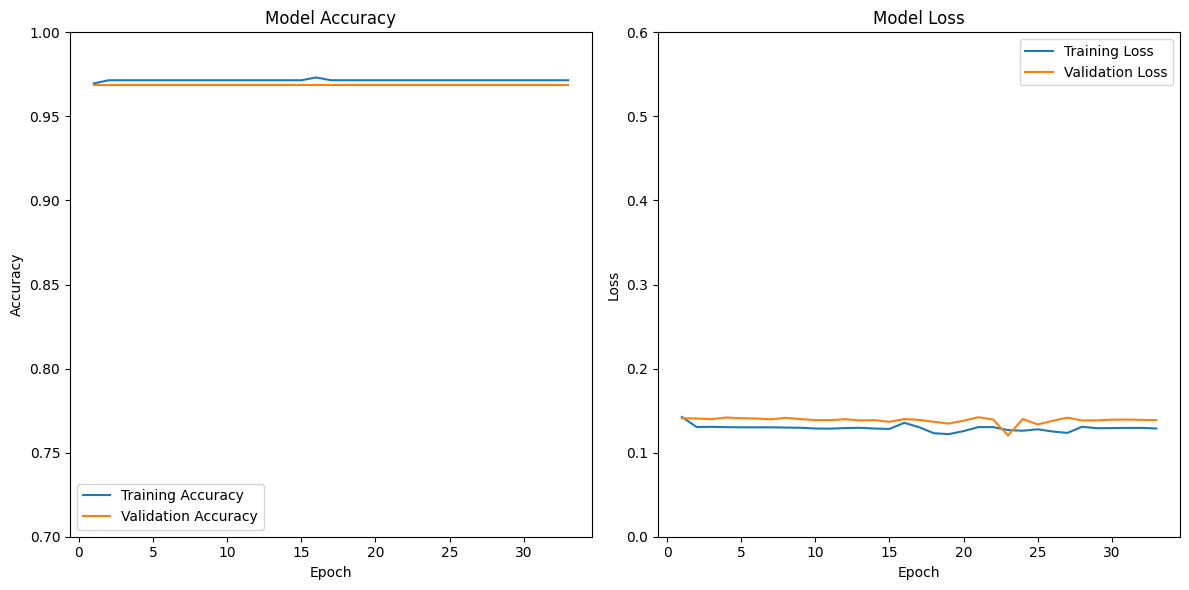

In [9]:
full_result_3 = pd.read_csv("./result_iot23/cm_3.csv")
draw_results(full_result_3)

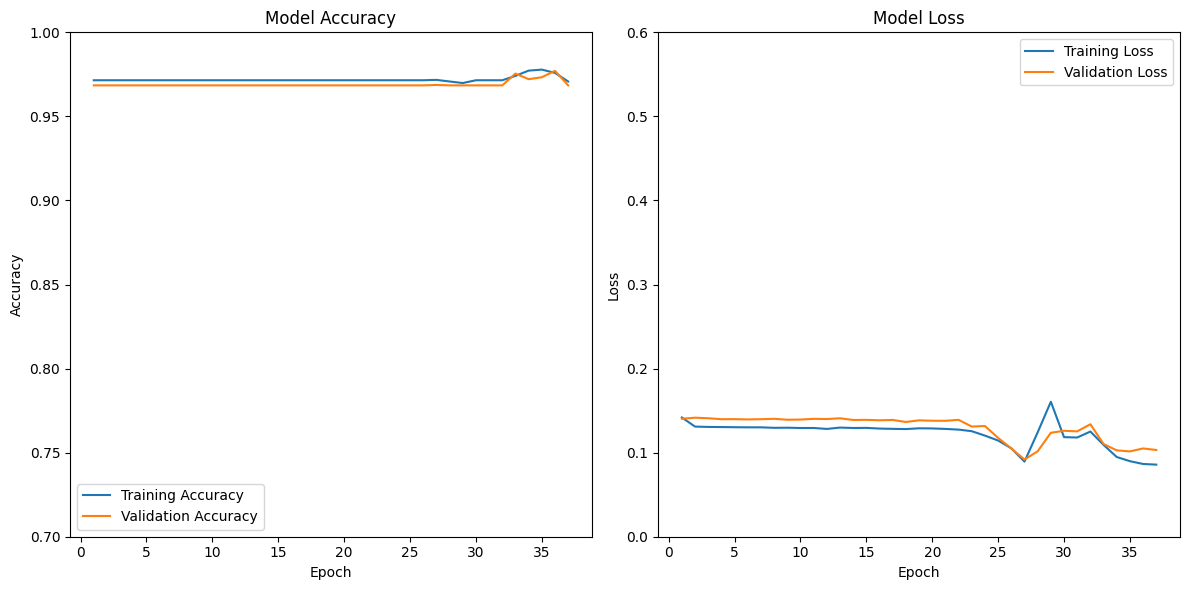

In [10]:
full_result_4 = pd.read_csv("./result_iot23/cm_4.csv")
draw_results(full_result_4)